In [85]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [86]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [19]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [22]:
#Get the actual size of the dataset
df.shape

(103, 7)

# Data Cleaning

In [87]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",","")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")


In [21]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [23]:
#CHecking null values
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [82]:
#Checking which row of acreage(hectare contains null value)
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [88]:
#Dropping the 99th row and reseting the index
df=df.dropna().reset_index()

In [89]:
#Removing Index and Continent column
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [29]:
df.head()

,index,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [90]:
df.drop("index",axis=1,inplace=True)

In [31]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [72]:
#Check the datatype of each column
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [91]:
#Changing the datatypes of few columns 
df["Production (Tons)"]=df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].astype(float)

In [92]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [35]:
#Checking the unique values
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

Univariate Analysis

In [37]:
#How many countries produce sugarcane from each continent?

df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

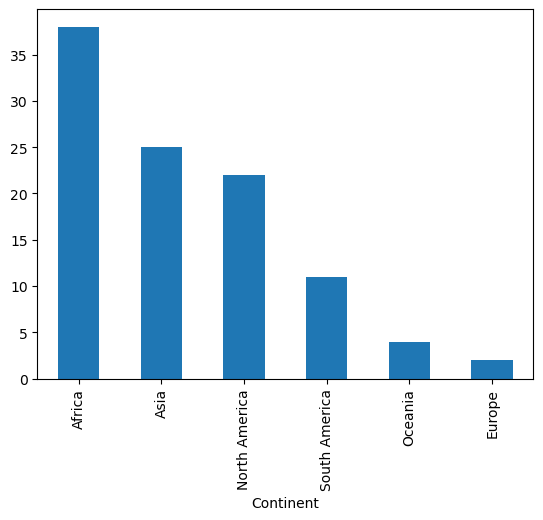

In [38]:
#getting bar graph for the above data
df["Continent"].value_counts().plot(kind='bar')

<Axes: >

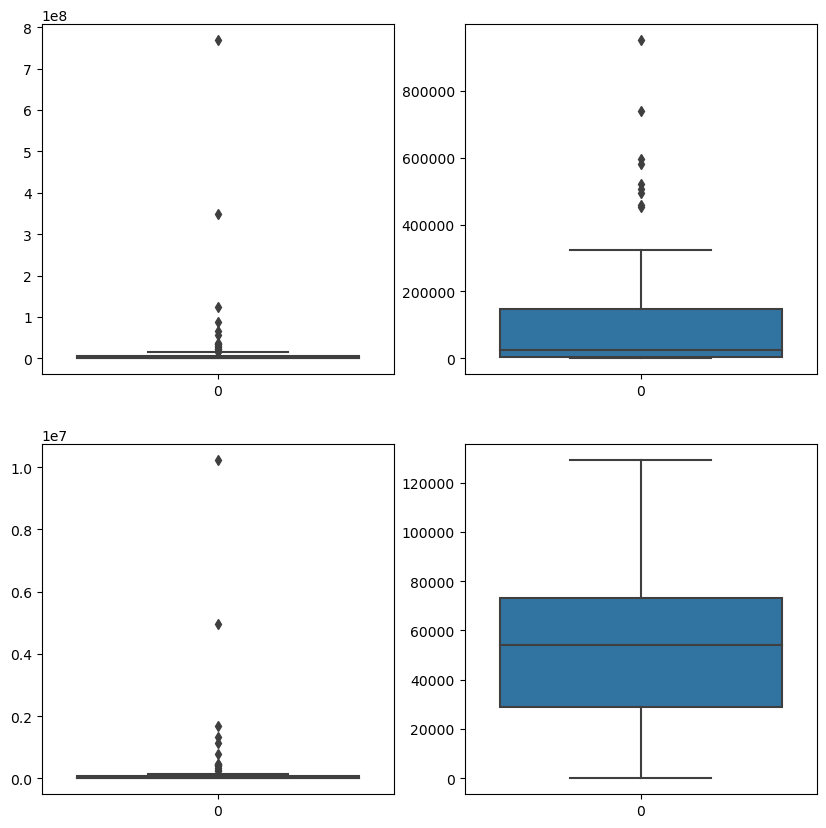

In [39]:
#Checking outliers
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])


In [40]:
#Describing every column
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


C:\Users\KIIT\AppData\Local\Temp\ipykernel_27500\935347903.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_27500\935347903.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Person (Kg)"])
C:\Users\KIIT\A

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

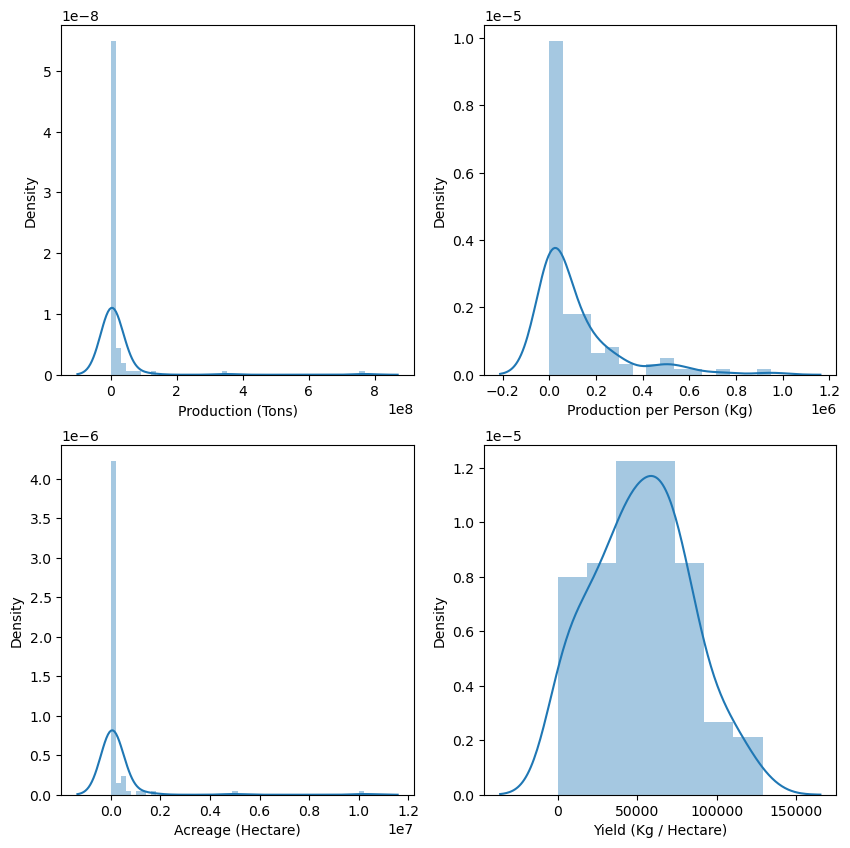

In [46]:
#Distribution of columns
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])


 Bivariate analysis

In [50]:
#Which country produces maximum sugarcane?

df_new=df[["Country", "Production (Tons)"]].set_index("Country")
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


<Axes: ylabel='Production (Tons)'>

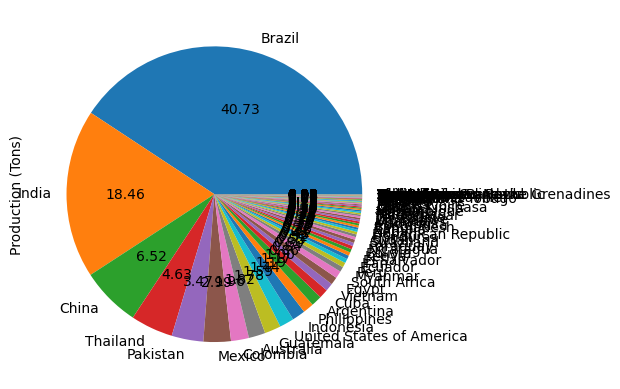

In [52]:
#Creating a piechart for the above data
df_new["Production (Tons)"].plot(kind="pie", autopct="%.2f")

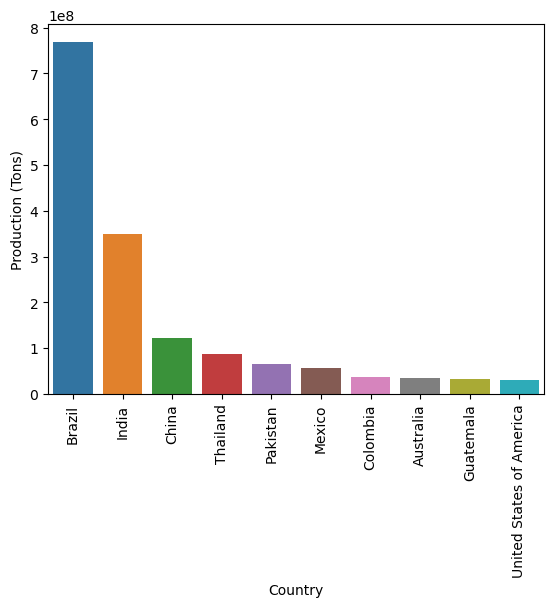

In [54]:
ax=sns.barplot(data=df.head(10),x="Country", y="Production (Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

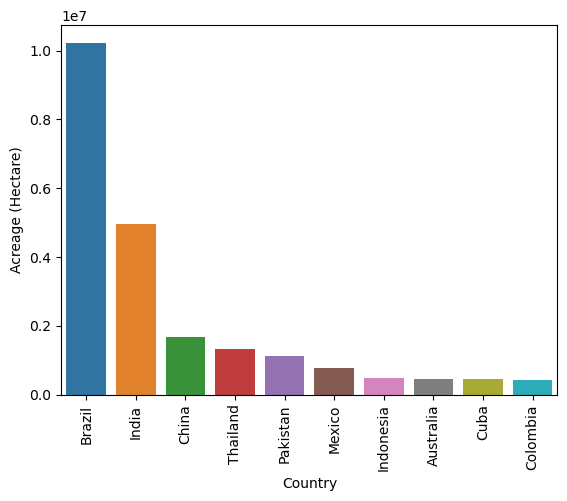

In [58]:
#Which country has the highest land?
df_land=df.sort_values("Acreage (Hectare)",ascending=False)
ax=sns.barplot(data=df_land.head(10),x="Country", y="Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


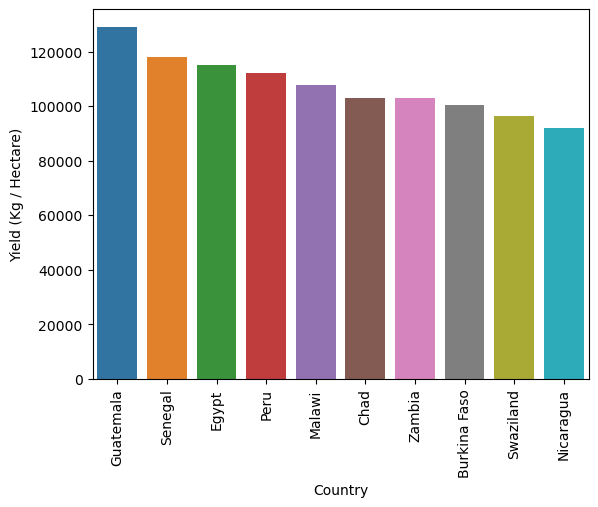

In [59]:
#Which country has highest yield per kg hectare
df_yield=df.sort_values("Yield (Kg / Hectare)",ascending=False)
ax=sns.barplot(data=df_yield.head(10),x="Country", y="Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

  Analyzing Continent wise data

In [93]:
df_continent=df.groupby("Continent").sum()
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.0,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,677192.7


<Axes: xlabel='Continent'>

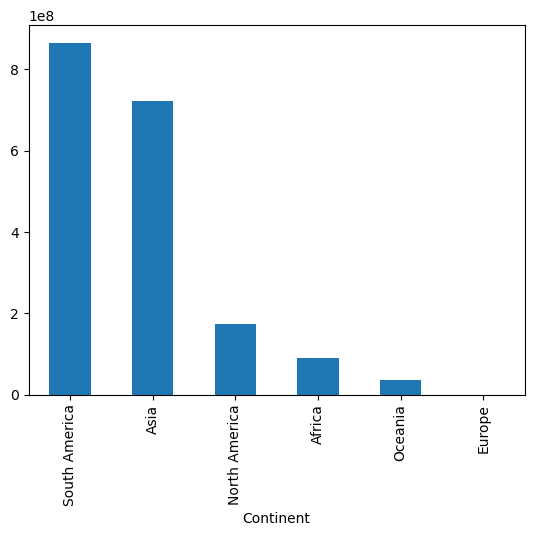

In [96]:
#which country produces maximum sugarcane?
df_continent["Production (Tons)"].sort_values(ascending=False).plot(kind="bar")

<Axes: ylabel='Production (Tons)'>

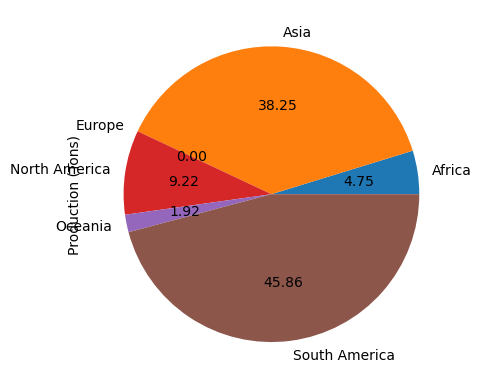

In [103]:
#Production distribution by continent
df_continent["Production (Tons)"].plot(kind="pie",autopct="%.2f")